# Сборный проект

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Шаг 1. Открытие файла и изучение общей информации

In [1]:
#загрузка используемых библиотек
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
pth1 = '/datasets/games.csv'
pth2 = 'games.csv'
#запись файла в переменную
if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
else:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Шаг 2. Подготовка данных

#### Замена названий столбцов

In [5]:
#приведение имен к нижнему регистру
df.rename(
    columns={col:col.lower() for col in df.columns},
    inplace=True
)

#### Удаление явных дубликатов

In [6]:
df.drop_duplicates()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Преобразование типов данных

In [7]:
#приведение типа данных столбца годов выпуска к целочисленному
df['year_of_release'] = df['year_of_release'].astype('Int64')

In [8]:
#приведение типа данных столбца пользовательских оценок к численному
#опуская нечисленные данные
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

#### Обработка пропусков

In [9]:
df['rating'].fillna('other', inplace=True)

In [10]:
#удаление строк с пропусками в столбце годов выпуска
df.dropna(subset=['year_of_release'], inplace=True)

#### Подсчет суммарных продаж

In [11]:
#названия столбцов с продажами по регионам
cols_to_sale = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
#вставка нового столбца с суммой продаж по всем регионам
df.insert(8, 'total_sales', df[cols_to_sale].sum(axis=1), False)

#### Вывод

Я провел подготовку данных для дальнейшего исследования:
* Привел названия столбцов к общепринятому виду
* Преобразовал типы данных
    * Привел значения year_of_release к целочисленному
    * Значения "tbd" (to be determined) в столбце user_score удалил и оставил пустыми, так как это обозначение ничего не давало для исследования
* Удалил строки с пропусками в столбце year_of_release
* Добавил столбец total_sales с суммой продаж со всех регионов

В данных присутствует большое количество пропусков (больше половины) в столбцах critic_score, user_score, rating. Эти данные брались из открытых источников, скорее всего, для многих игр они были не доступны по разным причинам. Заполнение какого либо значения на основе жанра, года выпуска и/или количества продаж излишне и вредно для дальнейшего исследования. К тому же оценки являются субъективной оценкой (извиняюсь) успешности игры. Главный критерий - количество проданных копий. 

Пропуски в year_of_release я удалил, потому что исследование будет опираться на периоды (по годам, актуальный или нет и т.д.).

Два пропуска в названии могли появиться из-за кодировки. Анализ по названиям игр проводиться не будет, поэтому пропуски в столбце name ни на что не влияют.

In [12]:
temp = df.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   total_sales      16446 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       7463 non-null   float64
 11  rating           16446 non-null  object 
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' '¡Shin Chan Flipa en colores!' nan]
name : кол-во

In [13]:
df.dropna(subset=['name','genre'], inplace=True)

### Шаг 3. Анализ данных

#### Количество игр по годам

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

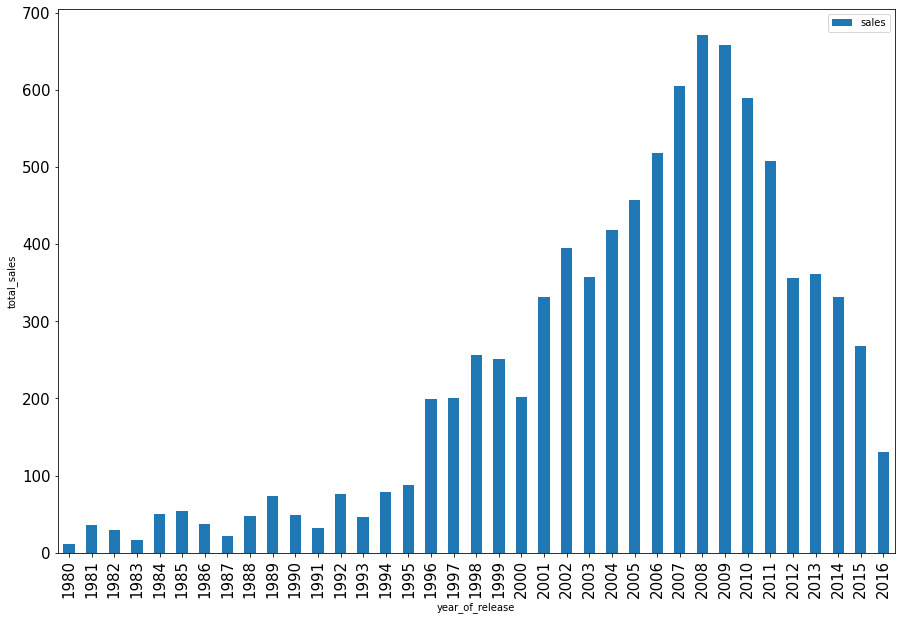

In [14]:
#вывод количества выпущенных titl'ов и общих продаж по годам
df.groupby('year_of_release').agg(
    sales=('total_sales','sum')
).plot(kind='bar', figsize=(15,10), fontsize=15, ylabel='total_sales')

<AxesSubplot:xlabel='year_of_release', ylabel='titles'>

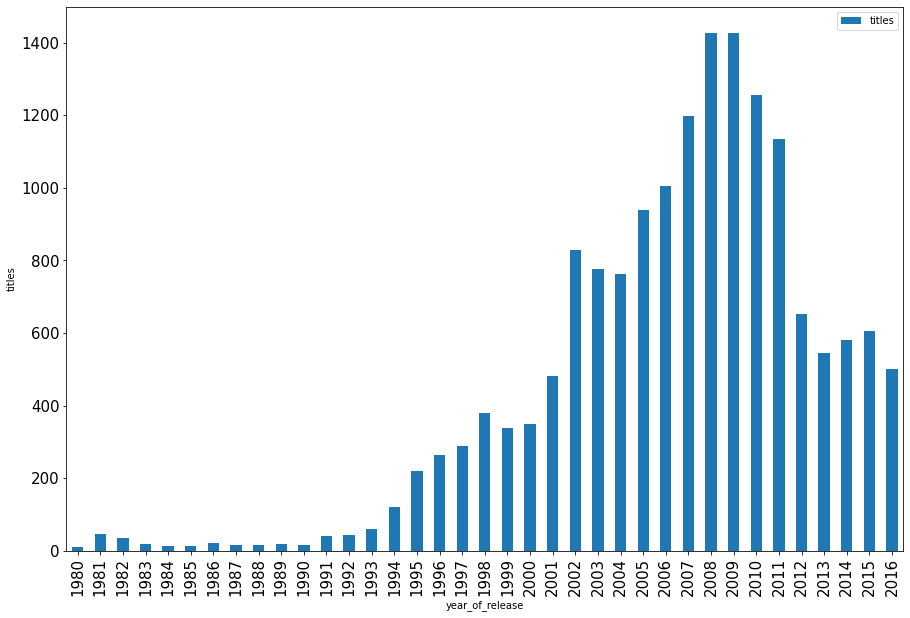

In [15]:
#вывод количества выпущенных titl'ов и общих продаж по годам
df.groupby('year_of_release').agg(
    titles=('name', 'count')
).plot(kind='bar', figsize=(15,10), fontsize=15, ylabel='titles')

Наблюдается тендеция спада продаж игра, после большого взлёта в 00'. Так как в данных нет количества денег, принесённых продажами, то нельзя однозначно сказать, что перспектива издательства игр хуже, чем была. Возможно, в последние годы гораздо больше соотношение больших проектов к маленьким + возможное уменьшение количества платформ, которые снискали популярность и закрепились среди людей, что будет проанализировано дальше.

#### Анализ платформ

In [16]:
(df.groupby('platform')
     .agg(count_titles=('year_of_release','count'),
          sales=('total_sales','sum'),
          count_years=('year_of_release','nunique'),
          min=('year_of_release','min'),
          max=('year_of_release','max')
         )
     .sort_values('sales', ascending=False)
)

,count_titles,sales,count_years,min,max
platform,,,,,
PS2,2127,1233.56,12,2000,2011
X360,1232,961.24,12,2005,2016
PS3,1306,931.34,11,2006,2016
Wii,1286,891.18,11,2006,2016
DS,2121,802.78,11,1985,2013
PS,1190,727.58,10,1994,2003
PS4,392,314.14,4,2013,2016
GBA,811,312.88,8,2000,2007
PSP,1193,289.53,12,2004,2015


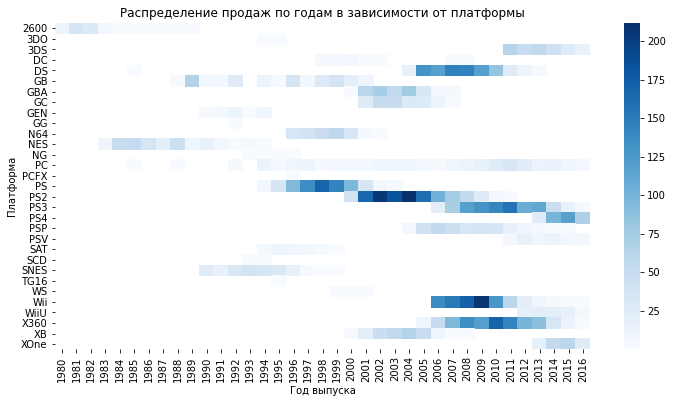

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    data=df.pivot_table(
        index='platform', 
        columns='year_of_release', 
        values='total_sales', 
        aggfunc='sum'), 
            cmap='Blues')
plt.title('Распределение продаж по годам в зависимости от платформы')
plt.xlabel('Год выпуска')
plt.ylabel('Платформа')
plt.show()

Как видно из таблицы популярные платформы "живут" чуть больше 10 лет

#### Актуализация данных

In [18]:
#список актуальных платформ
#те, у которых игры еще выходили в последний год 
topical_platform = (df.loc[df['year_of_release']
                      .apply(lambda x: (x == 2016)), 'platform']
                      .unique()
                   )

In [19]:
#таблица содержащая только актуальные платформы
topical_df = (df.loc[df['platform']
                    .apply(lambda x: (x in topical_platform))])

In [20]:
#фильтр по актуальным годам
topical_df = topical_df.loc[topical_df['year_of_release'] >= 2013]

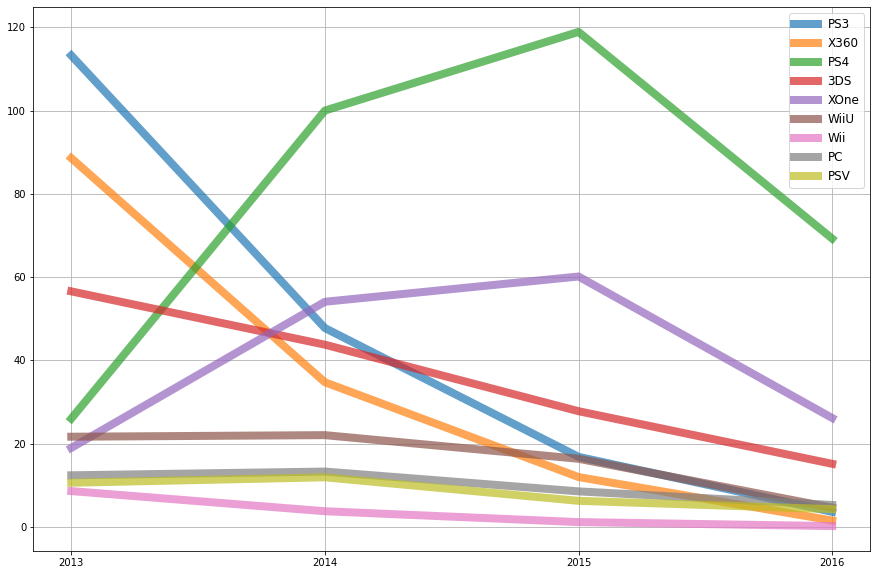

In [21]:
#графки количества проданных игр каждой актуальной платформы по годам
plt.figure(figsize=(15,10))
for i in topical_df['platform'].unique():
    plt.plot(
        (topical_df
         .loc[(topical_df['platform'] == i)]
         .groupby('year_of_release')
         .agg({'total_sales':'sum'})),
        linewidth=8.0,
        label=i,
        alpha=0.7
    )
plt.xticks(range(2013,2017))
plt.legend(prop={'size':12})
plt.grid(True)
plt.show()

Согласно данным, при общей тенднеции спада, есть всего 2 набирающие популярность платформы: PS4 и XOne. Что в принципе можно понять по их "молодому" возрасту. Также выделяются 3 платформы с заметно меньшим спадом по сравнению с общей картиной: 3DS, PC, PSV. Но у них и не было таких заметных продаж. Остальные платформы сильно теряли в количестве проданных игр за последние годы. 

#### Распределение продаж по платформам

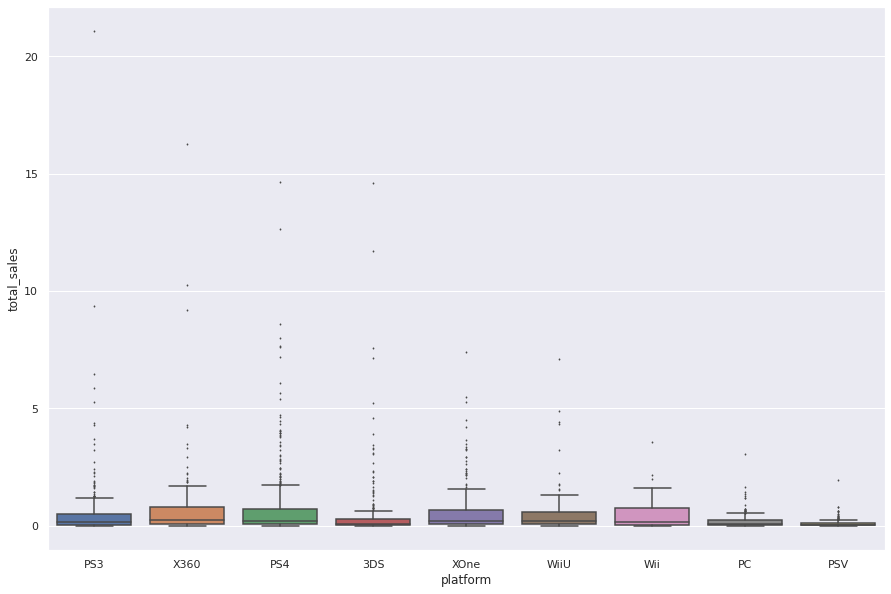

In [22]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(data=topical_df, x='platform', y='total_sales',fliersize=1)
None

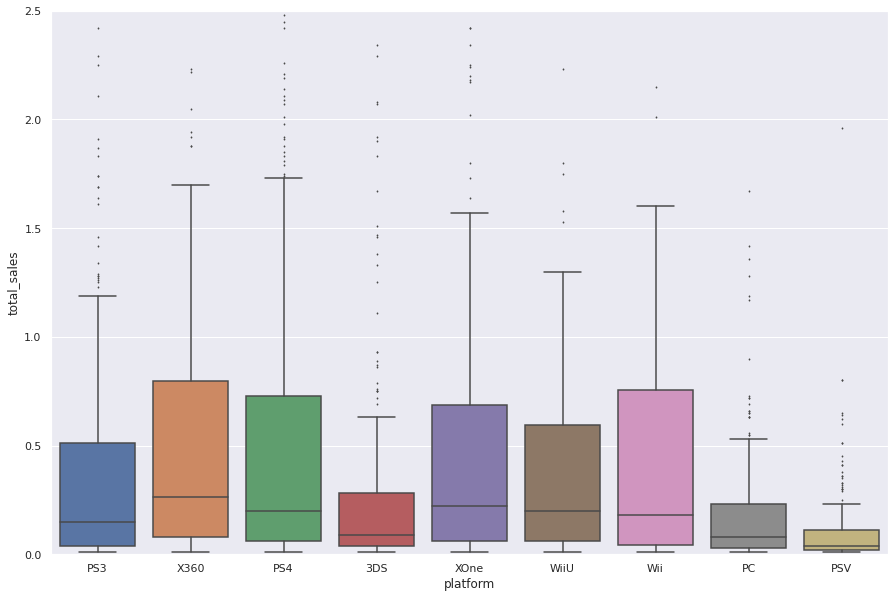

In [23]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(data=topical_df, x='platform', y='total_sales',fliersize=1).set(ylim=(0, 2.5))
None

X360, PS4, XOne, WiiU и Wii имеют самые стабильные высокие продажи игр.

#### Зависимость продаж от оценки пользователей и критиков

In [24]:
#общая таблица корреляции
for i in topical_df['platform'].unique():
        print(i,'\n', topical_df.loc[(topical_df['platform'] == i)
                                     &(~(topical_df['critic_score'].isnull()) | ~(topical_df['user_score'].isnull())),
                                     ['critic_score', 'user_score', 'total_sales']].corr(),'\n')

PS3 
               critic_score  user_score  total_sales
critic_score      1.000000    0.599920     0.334285
user_score        0.599920    1.000000     0.002394
total_sales       0.334285    0.002394     1.000000 

X360 
               critic_score  user_score  total_sales
critic_score      1.000000    0.520946     0.350345
user_score        0.520946    1.000000    -0.011742
total_sales       0.350345   -0.011742     1.000000 

PS4 
               critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.406568
user_score        0.557654    1.000000    -0.031957
total_sales       0.406568   -0.031957     1.000000 

3DS 
               critic_score  user_score  total_sales
critic_score      1.000000    0.769536     0.357057
user_score        0.769536    1.000000     0.241504
total_sales       0.357057    0.241504     1.000000 

XOne 
               critic_score  user_score  total_sales
critic_score      1.000000    0.472462     0.416998
user_score        0.4724

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

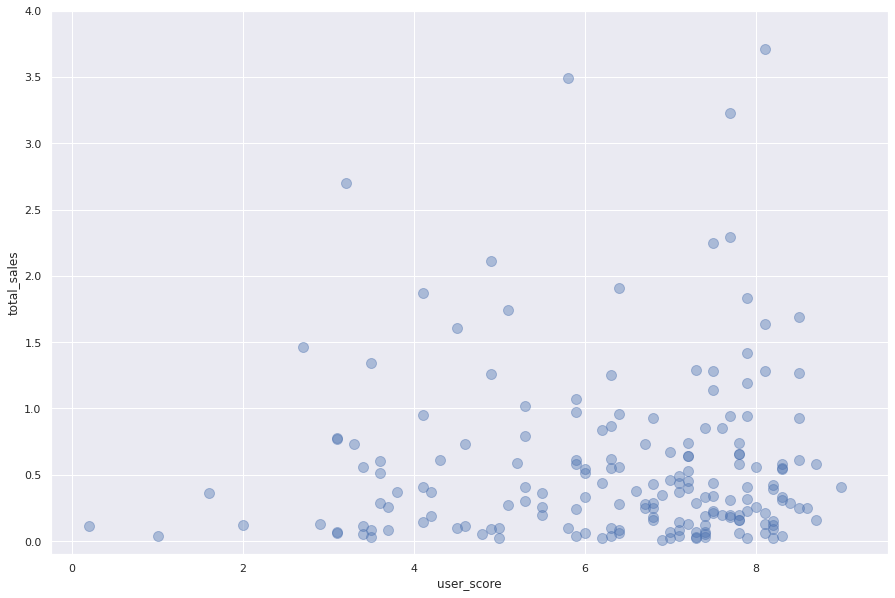

In [25]:
#диаграмма рассеивания по продажам от пользовательский оценок для PS3
(topical_df.loc[df['platform'] == 'PS3', ['user_score', 'total_sales']]
   .plot(x='user_score',
         y='total_sales',
         kind='scatter',
         alpha=0.4,
         ylim=(-0.1,4),
         s=100,
         color='b')
)

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

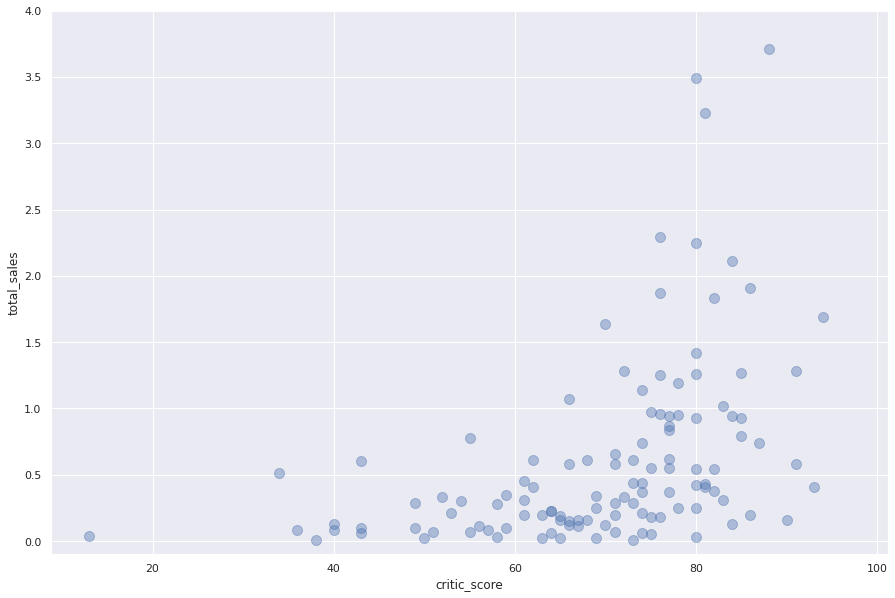

In [27]:
#-//- оценкам критиков
(topical_df.loc[df['platform'] == 'PS3', ['critic_score', 'total_sales']]
   .plot(x='critic_score',
         y='total_sales',
         kind='scatter',
         alpha=0.4,
         ylim=(-0.1,4),
         s=100,
         color='b')
)

In [28]:
topical_df.loc[(topical_df['platform'] == 'PS3'), ['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.599920,0.334285
user_score,0.599920,1.000000,0.002394
total_sales,0.334285,0.002394,1.000000


<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

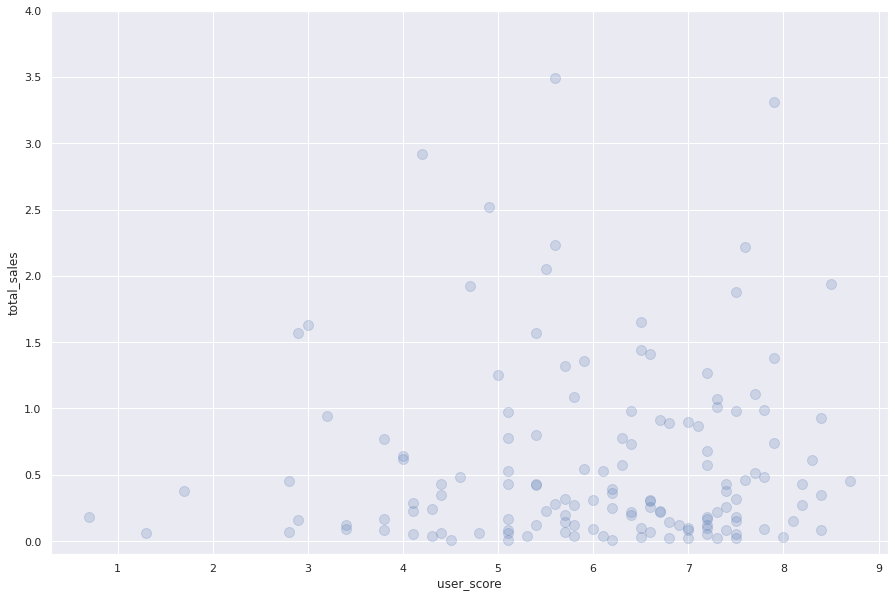

In [29]:
#диаграмма рассеивания по продажам от пользовательский оценок для XBOX360
(topical_df.loc[df['platform'] == 'X360', ['user_score', 'total_sales']]
   .plot(x='user_score',
         y='total_sales',
         kind='scatter',
         alpha=0.2,
         ylim=(-0.1,4),
         s=100,
         color='b')
)

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

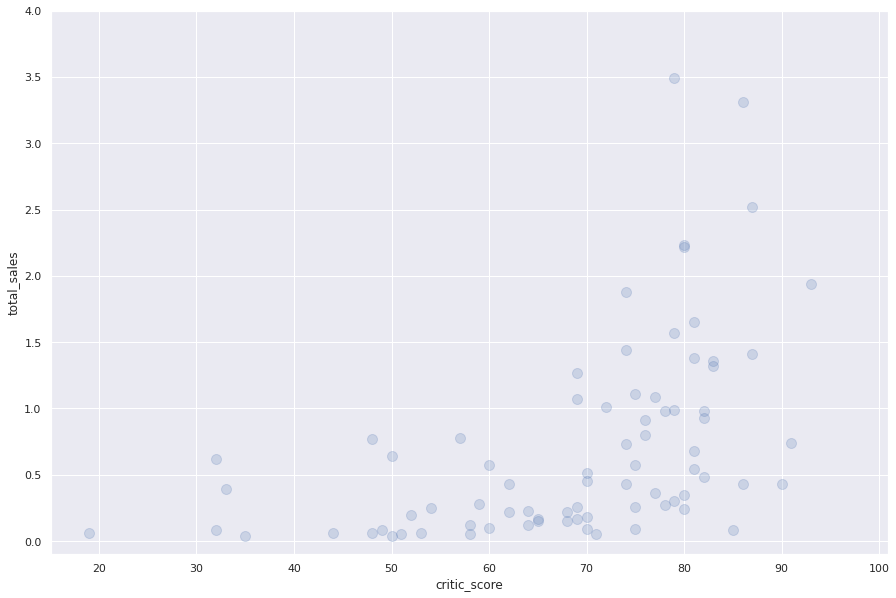

In [30]:
#--//-- оценок критиков
(topical_df.loc[df['platform'] == 'X360', ['critic_score', 'total_sales']]
   .plot(x='critic_score',
         y='total_sales',
         kind='scatter',
         alpha=0.2,
         ylim=(-0.1,4),
         s=100,
         color='b')
)

In [31]:
topical_df.loc[(topical_df['platform'] == 'X360'), ['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.520946,0.350345
user_score,0.520946,1.000000,-0.011742
total_sales,0.350345,-0.011742,1.000000


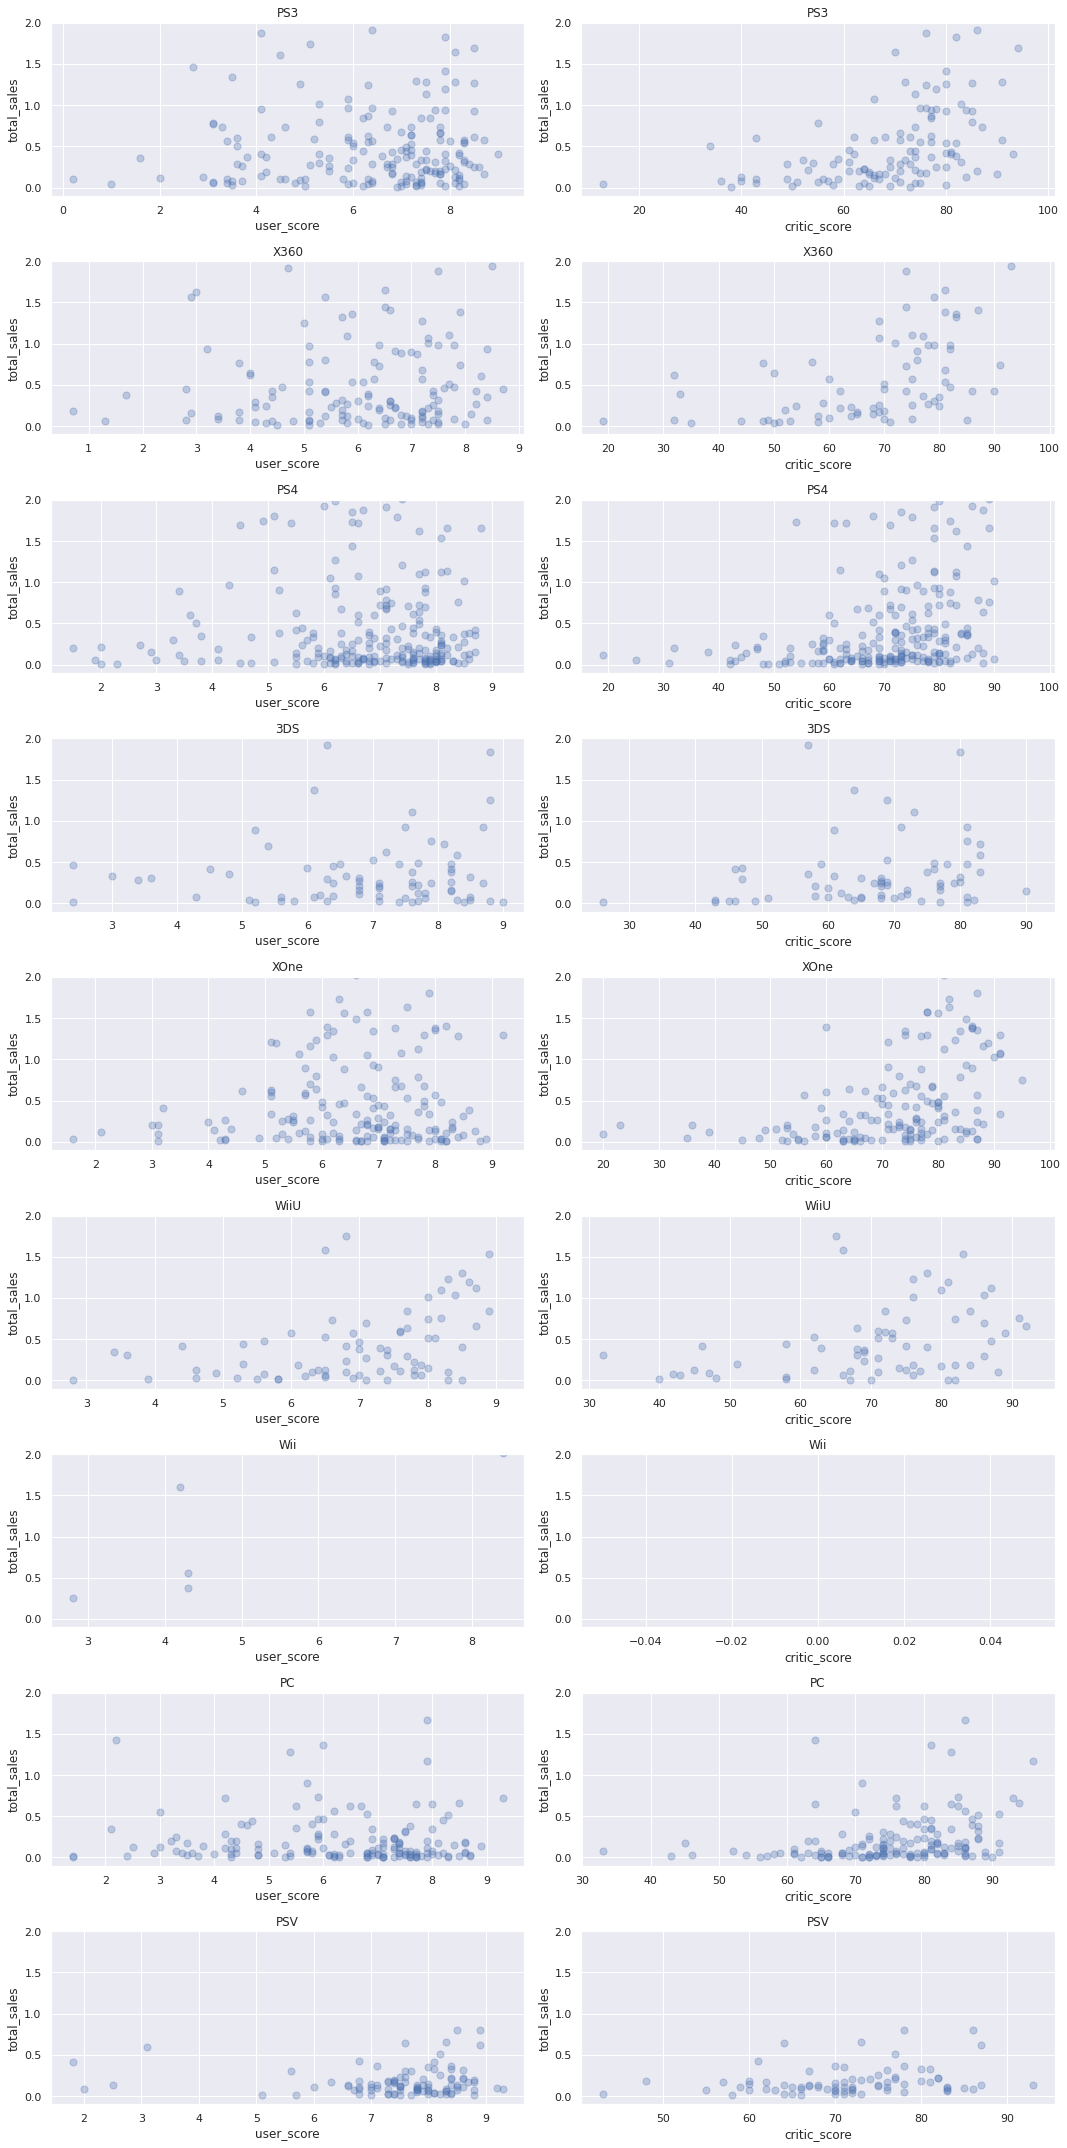

In [32]:
fig, axes = plt.subplots(ncols=2, nrows=9, figsize=(15, 30))

i=0
j=0
for score in ['user_score', 'critic_score']:
    for platform in topical_df['platform'].unique():
        (topical_df.loc[topical_df['platform'] == platform, [score, 'total_sales']]
         .plot(x=score,
               y='total_sales',
               kind='scatter',
               ax=axes[i,j],
               ylim=(-0.1,2),
               xlabel=score,
               title=platform,
               color='b',
               alpha=0.3,
               s=50
              )
        )
        i+=1
    j+=1
    i=0
        

fig.tight_layout()
plt.show()

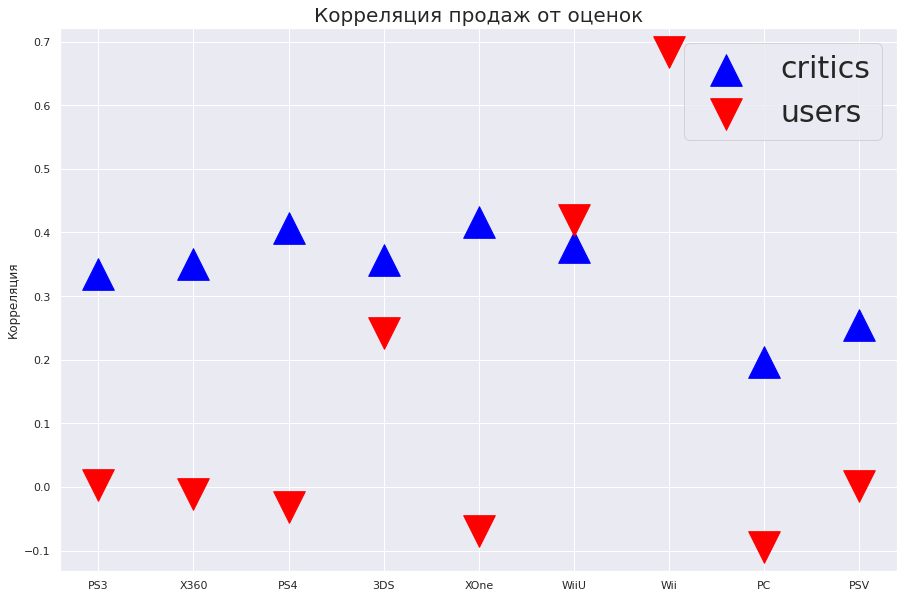

In [33]:
plt.figure(figsize=(15,10))
for i in topical_df['platform'].unique():
    blue = plt.scatter(
        x=i,
        y=(topical_df.loc[topical_df['platform'] == i, 'critic_score']
           .corr(topical_df.loc[topical_df['platform'] == i, 'total_sales'])),
        s=1000,
        color='blue',
        marker='^'
    )
    red = plt.scatter(
        x=i,
        y=(topical_df.loc[topical_df['platform'] == i, 'user_score']
           .corr(topical_df.loc[topical_df['platform'] == i, 'total_sales'])),
        s=1000,
        color='red',
        marker='v'
    )
plt.grid(True)
plt.title('Корреляция продаж от оценок', size=20)
plt.ylabel('Корреляция')
plt.legend((blue,red),('critics','users'),prop={'size':30})
plt.show()
None

#### Вывод

Wii и WiiU имееют заметную корреляцию продаж от оценок пользователей, а у остальных платформ она около 0. То есть нет зависимость успешности продаж. А оценки критиков больше влияют гораздо сильнее (корреляция равна 0.3-0.4)

#### Исследование жанров

In [34]:
genre_df = (topical_df[['genre','total_sales','critic_score','user_score']]
 .groupby('genre')
 .agg(
         {
             'total_sales':['sum', 'mean'],
             'genre':'count',
             'critic_score':'mean',
             'user_score':'mean'
         }
     )
)

In [35]:
genre_df.columns = [''] * len(genre_df.columns)
genre_df.columns = ['sum_sales', 'mean_sales', 'count_titles', 'mean_critic_score','mean_user_score']
genre_df['mean_critic_score'] = genre_df['mean_critic_score'] / 10
genre_df.sort_values('sum_sales', ascending=False)

,sum_sales,mean_sales,count_titles,mean_critic_score,mean_user_score
genre,,,,,
Action,320.51,0.426210,752,7.145367,6.842784
Shooter,232.98,1.245882,187,7.291791,6.342308
Sports,149.93,0.720817,208,7.166071,5.249686
Role-Playing,144.86,0.508281,285,7.346825,7.369630
Misc,62.57,0.428562,146,7.327907,6.975000
Platform,41.94,0.582500,72,7.382353,6.713793
Racing,39.89,0.469294,85,7.122951,6.080000
Fighting,35.29,0.446709,79,6.959524,7.037500
Adventure,22.90,0.108531,211,7.263830,7.461667


<AxesSubplot:title={'center':'Среднее количество проданных игр у каждого жанра'}, xlabel='genre', ylabel='mean_sales'>

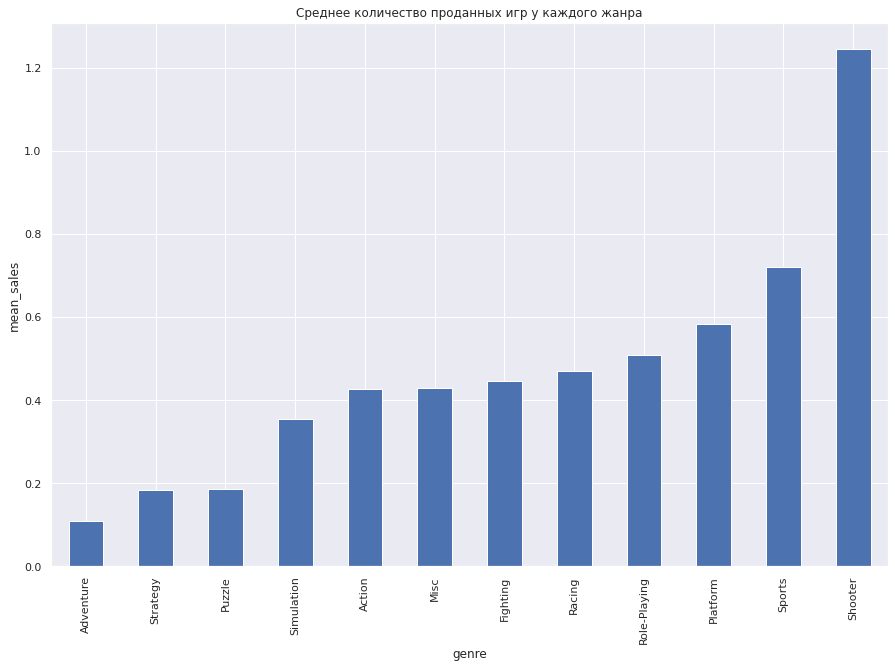

In [36]:
genre_df['mean_sales'].sort_values().plot(kind='bar', ylabel='mean_sales', title='Среднее количество проданных игр у каждого жанра')

Спортивные игры, платформинг и шутеры занимает первые места по средним продажам в этих жанрах, а вот приключенческие, стратегически и игры-пазлы - последние с заметным отстованием от остальных. 

### Шаг 4. Портреты пользователей каждого региона

#### Самые популярные платформы по регионам

In [37]:
platform_na = (topical_df[['platform','na_sales','critic_score','user_score']]
 .groupby('platform')
 .agg(
         {
             'na_sales':['sum', 'mean'],
             'platform':'count',
             'critic_score':'mean',
             'user_score':'mean'
         }
     )
)
platform_na.columns = [''] * len(platform_na.columns)
platform_na.columns = ['na_sales', 'mean_sales', 'titles', 'mean_critic_score','mean_user_score']
platform_na['mean_critic_score'] = platform_na['mean_critic_score'] / 10
platform_na.sort_values('na_sales', ascending=False, inplace=True)

In [38]:
platform_eu = (topical_df[['platform','eu_sales','critic_score','user_score']]
 .groupby('platform')
 .agg(
         {
             'eu_sales':['sum', 'mean'],
             'platform':'count',
             'critic_score':'mean',
             'user_score':'mean'
         }
     )
)
platform_eu.columns = [''] * len(platform_eu.columns)
platform_eu.columns = ['eu_sales', 'mean_sales', 'titles', 'mean_critic_score','mean_user_score']
platform_eu['mean_critic_score'] = platform_eu['mean_critic_score'] / 10
platform_eu.sort_values('eu_sales', ascending=False, inplace=True)

In [39]:
platform_jp = (topical_df[['platform','jp_sales','critic_score','user_score']]
 .groupby('platform')
 .agg(
         {
             'jp_sales':['sum', 'mean'],
             'platform':'count',
             'critic_score':'mean',
             'user_score':'mean'
         }
     )
)
platform_jp.columns = [''] * len(platform_jp.columns)
platform_jp.columns = ['jp_sales', 'mean_sales', 'titles', 'mean_critic_score','mean_user_score']
platform_jp['mean_critic_score'] = platform_jp['mean_critic_score'] / 10
platform_jp.sort_values('jp_sales', ascending=False, inplace=True)

In [40]:
print(platform_na.head())
print(platform_eu.head())
print(platform_jp.head())

          na_sales  mean_sales  titles  mean_critic_score  mean_user_score
platform                                                                  
PS4         108.74    0.277398     392           7.209127         6.748249
XOne         93.12    0.377004     247           7.332544         6.521429
X360         81.66    0.439032     186           6.923457         5.993007
PS3          63.50    0.184058     345           7.019835         6.348387
3DS          38.20    0.126073     303           6.833803         6.976250
          eu_sales  mean_sales  titles  mean_critic_score  mean_user_score
platform                                                                  
PS4         141.09    0.359923     392           7.209127         6.748249
PS3          67.81    0.196551     345           7.019835         6.348387
XOne         51.59    0.208866     247           7.332544         6.521429
X360         42.52    0.228602     186           6.923457         5.993007
3DS          30.96    0.1

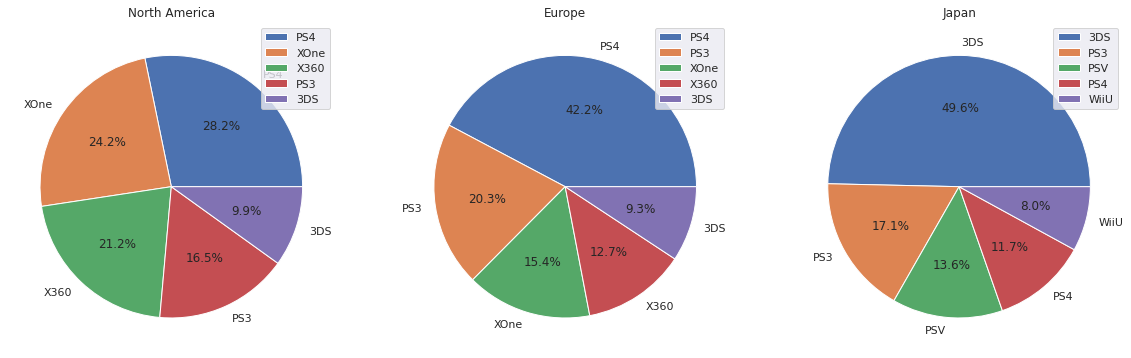

In [41]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 10))
platform_na.head().plot(x='platform', y='na_sales', kind='pie', ax=axes[0], autopct='%1.1f%%', ylabel='', title='North America')
platform_eu.head().plot(x='platform', y='eu_sales', kind='pie', ax=axes[1], autopct='%1.1f%%', ylabel='', title='Europe')
platform_jp.head().plot(x='platform', y='jp_sales', kind='pie', ax=axes[2], autopct='%1.1f%%', ylabel='', title='Japan')
None

#### Вывод

Самый большой регион по продажам это Америка. Как в общем, так и в среднем там продается больше игр. Платформы от Microsoft лидируют с заметным преимуществом. Тогда как в Европа большинство пользуется последней Playstation. Еще в топ 5 попал персональный компьютер. В это же время в Азии самые популярные платформы - Азиатские, но продажи даже у них на порядок ниже, чем в других регионах.

#### Самые популярные жанры по регионам

In [42]:
genre_na = (topical_df[['genre','na_sales','critic_score','user_score']]
 .groupby('genre')
 .agg(
         {
             'na_sales':['sum', 'mean'],
             'genre':'count',
             'critic_score':'mean',
             'user_score':'mean'
         }
     )
)
genre_na.columns = [''] * len(genre_na.columns)
genre_na.columns = ['na_sales', 'mean_sales', 'count', 'mean_critic_score','mean_user_score']
genre_na['mean_critic_score'] = genre_na['mean_critic_score'] / 10
genre_na.sort_values('na_sales', ascending=False, inplace=True)

In [43]:
genre_eu = (topical_df[['genre','eu_sales','critic_score','user_score']]
 .groupby('genre')
 .agg(
         {
             'eu_sales':['sum', 'mean'],
             'genre':'count',
             'critic_score':'mean',
             'user_score':'mean'
         }
     )
)
genre_eu.columns = [''] * len(genre_eu.columns)
genre_eu.columns = ['eu_sales', 'mean_sales', 'count', 'mean_critic_score','mean_user_score']
genre_eu['mean_critic_score'] = genre_eu['mean_critic_score'] / 10
genre_eu.sort_values('eu_sales', ascending=False, inplace=True)

In [44]:
genre_jp = (topical_df[['genre','jp_sales','critic_score','user_score']]
 .groupby('genre')
 .agg(
         {
             'jp_sales':['sum', 'mean'],
             'genre':'count',
             'critic_score':'mean',
             'user_score':'mean'
         }
     )
)
genre_jp.columns = [''] * len(genre_jp.columns)
genre_jp.columns = ['jp_sales', 'mean_sales', 'count', 'mean_critic_score','mean_user_score']
genre_jp['mean_critic_score'] = genre_jp['mean_critic_score'] / 10
genre_jp.sort_values('jp_sales', ascending=False, inplace=True)

In [45]:
print(genre_na.head())
print(genre_eu.head())
print(genre_jp.head())

              na_sales  mean_sales  count  mean_critic_score  mean_user_score
genre                                                                        
Action          125.83    0.167327    752           7.145367         6.842784
Shooter         109.74    0.586845    187           7.291791         6.342308
Sports           65.27    0.313798    208           7.166071         5.249686
Role-Playing     46.40    0.162807    285           7.346825         7.369630
Misc             27.46    0.188082    146           7.327907         6.975000
              eu_sales  mean_sales  count  mean_critic_score  mean_user_score
genre                                                                        
Action          117.87    0.156742    752           7.145367         6.842784
Shooter          87.86    0.469840    187           7.291791         6.342308
Sports           60.34    0.290096    208           7.166071         5.249686
Role-Playing     36.97    0.129719    285           7.346825    

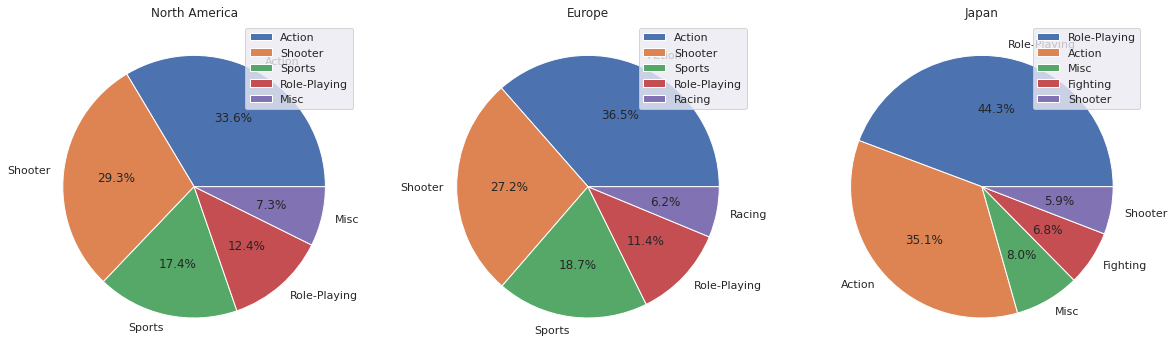

In [46]:
fig, axes = plt.subplots(ncols=3, figsize=(20, 10))
genre_na.head().plot(x='genre', y='na_sales', kind='pie', ax=axes[0], autopct='%1.1f%%', ylabel='', title='North America')
genre_eu.head().plot(x='genre', y='eu_sales', kind='pie', ax=axes[1], autopct='%1.1f%%', ylabel='', title='Europe')
genre_jp.head().plot(x='genre', y='jp_sales', kind='pie', ax=axes[2], autopct='%1.1f%%', ylabel='', title='Japan')
None

#### Вывод

Жанры популярные в Европе и Америке одни и те же: Экшен, шутер и спорт. Столбом стоит Японский сектор - у них на первом месте Ролевые игры, которые на Американском рынке занимают 5-ую позицию, а популярный жанр шутеров вообще не попал в Топ 5.

In [47]:
topical_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,21.05,97.0,8.2,M
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,16.27,97.0,8.1,M
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,14.63,NaN,NaN,other
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,14.60,NaN,NaN,other
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,12.62,97.0,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,other
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.01,NaN,NaN,other
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,other
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,other


#### Влияние ESRB на продажи

In [48]:
list(topical_df['rating'].unique())

['M', 'other', 'E', 'T', 'E10+']

In [49]:
esrb_eu = topical_df.groupby('rating').agg({'eu_sales':'mean'})

In [50]:
esrb_na = topical_df.groupby('rating').agg({'na_sales':'mean'})

In [51]:
esrb_jp = topical_df.groupby('rating').agg({'jp_sales':'mean'})

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

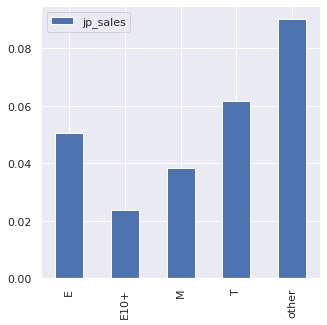

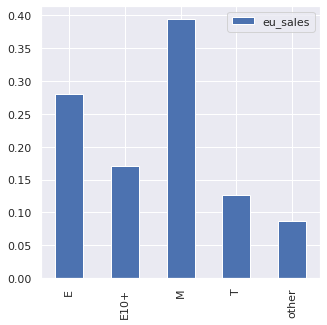

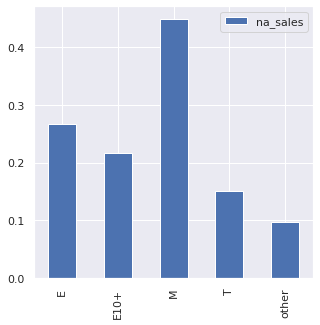

In [52]:
display(esrb_jp.plot(kind='bar',figsize=(5,5), xlabel=''))
display(esrb_eu.plot(kind='bar',figsize=(5,5), xlabel=''))
display(esrb_na.plot(kind='bar',figsize=(5,5), xlabel=''))

Категория Mature самая популярная категория в Европе и Америке, в Японии продаются лучше игры с категорией teen и "для всех", но преобладающее количество игр без рейтинга.

### Шаг 5. Проверка гипотез

#### Гипотеза 1:

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
H_0: Средние пользовательские рейтинги (user_score) платформы Xbox One = рейтингу платформы PC`
H_1: Средние пользовательские рейтинги (user_score) платформы Xbox One ≠ рейтингу платформы PC`
alpha = 0.05
```

In [54]:
results = st.ttest_ind(
    topical_df.loc[(topical_df['platform'] == 'XOne') & ~(topical_df['user_score']).isnull(), 'user_score'],
    topical_df.loc[(topical_df['platform'] == 'PC') & ~(topical_df['user_score']).isnull(), 'user_score'],
    equal_var = False
)
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


##### Вывод

Результаты теста студента говорят о том, что нельзя отвергать нулевую гипотезу о том, что средние оценки пользователей платформ XBOX One & PC равны.

Проверим это подсчитав средние оценки

In [55]:
mean_score_pc = round(topical_df.loc[topical_df['platform'] == 'PC', 'user_score'].mean(), 2)
mean_score_xone = round(topical_df.loc[topical_df['platform'] == 'XOne', 'user_score'].mean(), 2)
print(f'Средняя оценок пользователей на платформе PC равна {mean_score_pc}, а средняя XBOX One {mean_score_xone}')

Средняя оценок пользователей на платформе PC равна 6.27, а средняя XBOX One 6.52


#### Гипотеза 2:

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

```
H_0: Средние пользовательские рейтинги (user_score) жанра Action = рейтингу жанра Sports`
H_1: Средние пользовательские рейтинги (user_score) жанра Action ≠ рейтингу жанра Sports`
alpha = 0.05
```

In [56]:
results = st.ttest_ind(
    topical_df.loc[(topical_df['genre'] == 'Action') & ~(topical_df['user_score']).isnull(), 'user_score'],
    topical_df.loc[(topical_df['genre'] == 'Sports') & ~(topical_df['user_score']).isnull(), 'user_score'],
    equal_var = False
)
alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

2.419141451747253e-20
Отвергаем нулевую гипотезу


##### Вывод

Результаты теста студента говорят о том, что на имеющихся данных на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве значений пользовательских оценок жанров Acion и Sports в пользу альтернативной гипотезы.

Проверим это подсчитав средние значения:

In [57]:
mean_score_act = round(topical_df.loc[topical_df['genre'] == 'Action', 'user_score'].mean(), 2)
mean_score_sport = round(topical_df.loc[topical_df['genre'] == 'Sports', 'user_score'].mean(), 2)
print(f'Средняя оценок пользователей жанра Action равна {mean_score_act}, а средняя Sports {mean_score_sport}')

Средняя оценок пользователей жанра Action равна 6.84, а средняя Sports 5.25


Нулевая гипотеза должна заключать в себе равенство, а альтрнативная противоречит ей полностью. То есть, если нужно проверить равенство средних оценок по жанрам или платформам, то нулевая гипотеза будет равенство средних этих оценок, а альтернативная - неравенство. 

p-value - уровень значимости, на котором находятся друг от друга среднее значение и то, с которым производится сравнение

Параметрические критерии предполагают, что выборка порождена распределением из заданного параметрического семейства. t-критерий специальный случай двухвыборочных критериев согласия. Проверяется гипотеза сдвига, согласно которой распределения двух выборок имеют одинаковую форму и отличаются только сдвигом на константу. t-критерий для двух независимых выборок проверяет гипотезу о равенстве средних в двух выборках.

### Шаг 6: Общий вывод

Для анализа рынка игр я взял актуальные период за последние 4 года, что в среднем половина "жизни" платформы

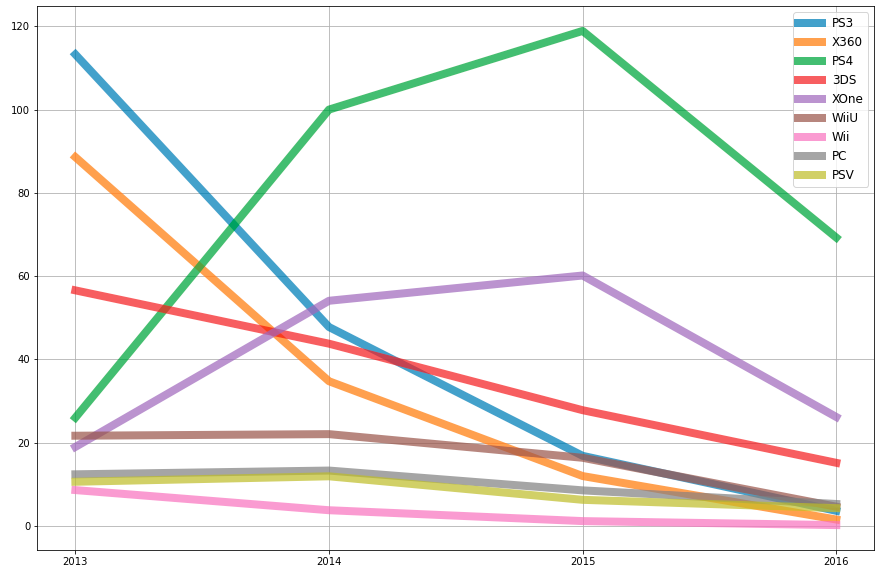
* Согласно данным, при общей тенднеции спада, есть всего 2 набирающие популярность платформы: PS4 и XOne (данные за 2016 год неполные, поэтому графики на спаде)




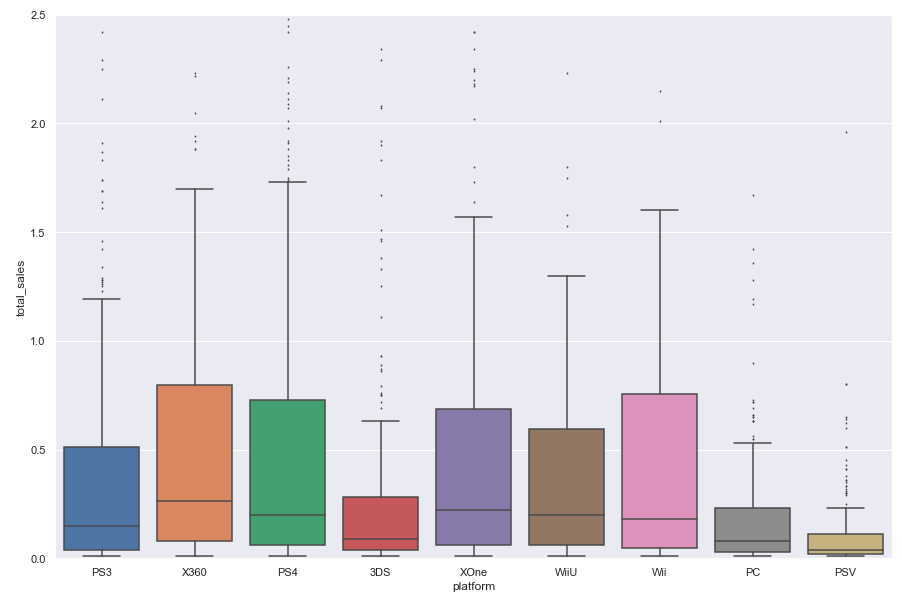
* Эти платформы, наряду с некоторыми другими, но уже неактуальными, имеют стабильно высокие продажи



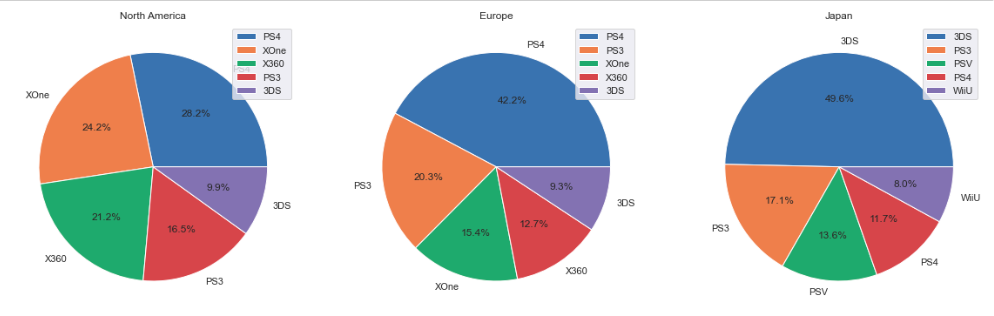
* PS4 и Xbox One вместе занимают больше половины (52.4%) самого крупного рынка - Америки. В 422 Европе доминирует PS4 (42.2%). В Японии следуюет обратить внимание на платформу 3DS - 49.2% доля




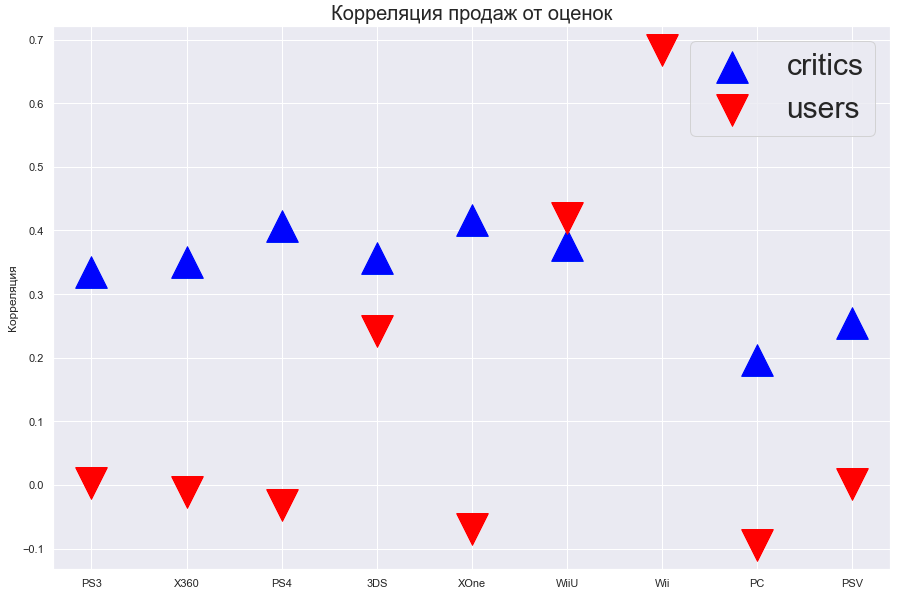
* Прослеживается низкая зависимость успешности продаж и оценок пользователей, а корреляция оценок критиков заметно выше. Имеет смысл обратить внимание, благодаря чему игры получают высокие оценки от профессионалов




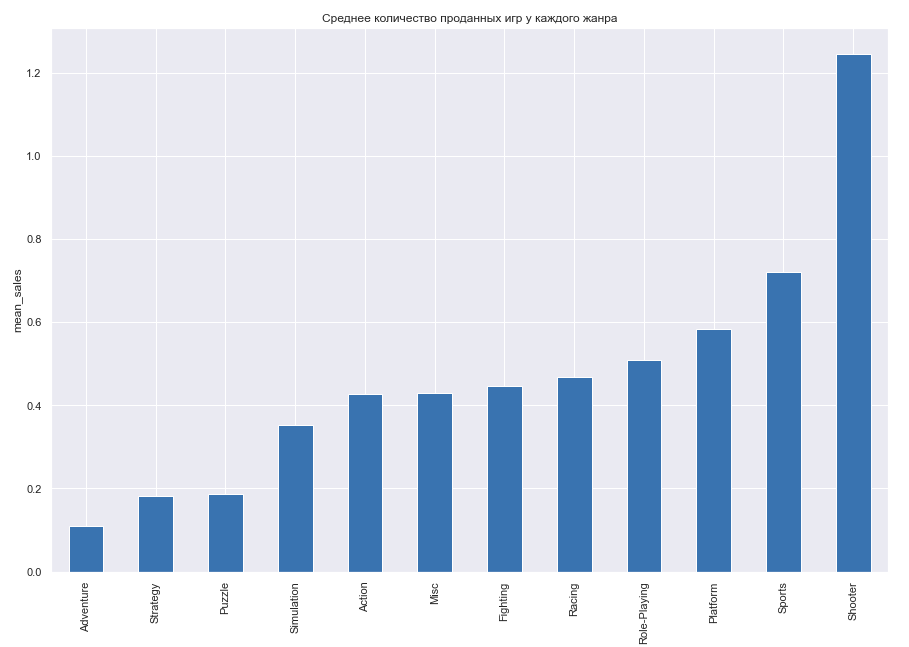
* Средние продажи "Шутеров" в два раза превышают средние продажи спортивных игр, которые занимают второе место по этому критерию. 

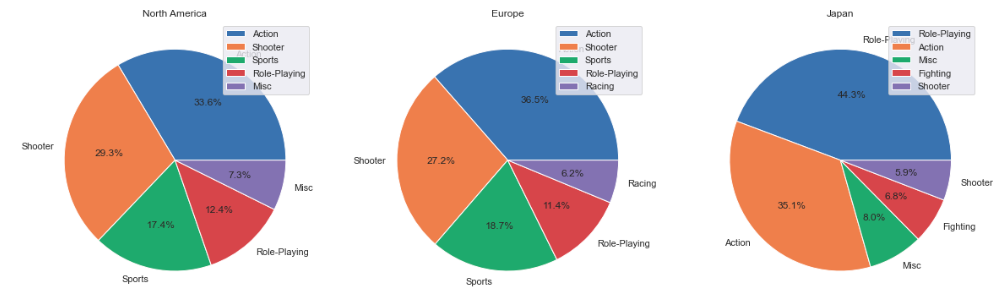
* При взгляде на распределение жанров по рынкам, стоит акцентироваться на 3 жанра для Америки и Европе: Action, Shooter и Sports, которые занимают около 80% среди топ 5 жанров. А в Японии вместе с Action занимает >75% топ жанров занимают игры жанра Role Playing




Для продвижения игр еще нужно обратить внимание на распределение продаж на возростной рейтинг игр
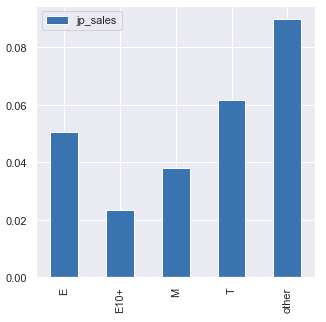
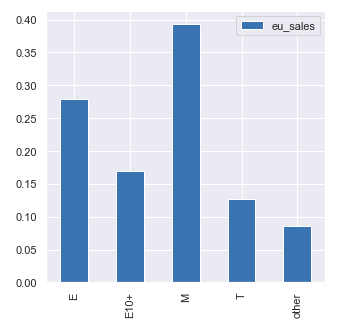
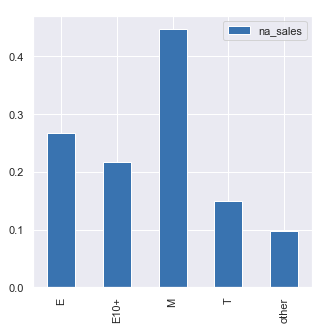
* Категория Mature самая популярная категория в Европе и Америке. В Японии продаются лучше игры с категорией teen и "для всех", но преобладающее количество игр без рейтинга ESRB, так как они используют собственные критерии для своих игр.